In [1]:
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd


import seaborn as sns; sns.set()

from bokeh.charts import BoxPlot, show
from bokeh.io import push_notebook,show,output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure 
output_notebook()

%matplotlib inline


Loading BokehJS ...

In [2]:
mat = loadmat('693ffd_compareResponse_block_1.mat',squeeze_me=1)

In [3]:
respLo = mat['respLo']
respHi = mat['respHi']
button = mat['buttonLocs']

In [4]:
dataF = pd.DataFrame(button)

In [5]:
pd.melt(dataF.transpose()).unstack()


variable  0                                                    0
          1                                                    1
          2                                                    2
          3                                                    3
          4                                                    4
          5                                                    5
          6                                                    6
value     0    [1.0473472, 0.50675712, 0.47706112, 0.15065088...
          1    [nan, nan, 3.3386496, nan, nan, 3.37506304, na...
          2    [nan, nan, nan, nan, nan, nan, nan, 1.7645568,...
          3    [nan, nan, nan, nan, nan, nan, nan, 4.096e-05,...
          4    [nan, nan, 3.47537408, 0.4087808, nan, nan, 3....
          5    [0.5871616, 0.68558848, 0.44388352, 0.59080704...
          6    [0.85782528, 0.92409856, 1.26763008, 0.4507238...
dtype: object

In [6]:
pd.melt(dataF)

,variable,value
0,0,"[1.0473472, 0.50675712, 0.47706112, 0.15065088..."
1,0,"[nan, nan, 3.3386496, nan, nan, 3.37506304, na..."
2,0,"[nan, nan, nan, nan, nan, nan, nan, 1.7645568,..."
3,0,"[nan, nan, nan, nan, nan, nan, nan, 4.096e-05,..."
4,0,"[nan, nan, 3.47537408, 0.4087808, nan, nan, 3...."
5,0,"[0.5871616, 0.68558848, 0.44388352, 0.59080704..."
6,0,"[0.85782528, 0.92409856, 1.26763008, 0.4507238..."


In [7]:
button = mat['buttonLocs']
mdtype = button.dtype
a = np.arange(0,button.shape[0])
b = list(range(140))
ndata = {n: button[n] for n in a}


In [8]:
temp4 = pd.melt(dataF)

In [9]:
temp4

,variable,value
0,0,"[1.0473472, 0.50675712, 0.47706112, 0.15065088..."
1,0,"[nan, nan, 3.3386496, nan, nan, 3.37506304, na..."
2,0,"[nan, nan, nan, nan, nan, nan, nan, 1.7645568,..."
3,0,"[nan, nan, nan, nan, nan, nan, nan, 4.096e-05,..."
4,0,"[nan, nan, 3.47537408, 0.4087808, nan, nan, 3...."
5,0,"[0.5871616, 0.68558848, 0.44388352, 0.59080704..."
6,0,"[0.85782528, 0.92409856, 1.26763008, 0.4507238..."


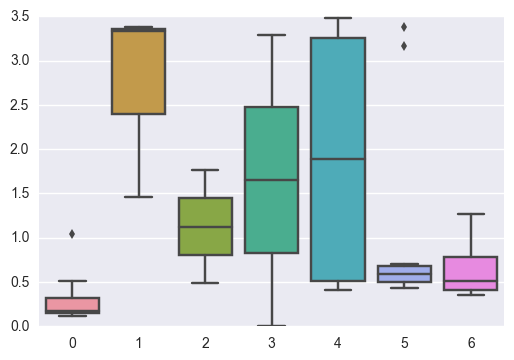

In [10]:
sns.boxplot(data = button)

In [11]:
dataFdict = pd.DataFrame.from_dict(ndata,orient='columns')

In [12]:
dataFdict.melt

,0,1,2,3,4,5,6
0,1.047347,NaN,NaN,NaN,NaN,0.587162,0.857825
1,0.506757,NaN,NaN,NaN,NaN,0.685588,0.924099
2,0.477061,3.338650,NaN,NaN,3.475374,0.443884,1.267630
3,0.150651,NaN,NaN,NaN,0.408781,0.590807,0.450724
4,0.300769,NaN,NaN,NaN,NaN,NaN,0.952771
5,0.155894,3.375063,NaN,NaN,NaN,3.164365,0.413983
6,0.131727,NaN,NaN,NaN,3.215524,0.698204,0.413327
7,0.152494,NaN,1.764557,0.000041,3.228303,3.383706,NaN
8,0.176374,NaN,NaN,NaN,0.466125,0.502866,0.396288
9,0.181862,NaN,NaN,NaN,NaN,NaN,0.391782


In [13]:
dataFdict.columns = ['tactor','no stimulation','off target stimulation','100 ms train','200 ms train','400 ms train','800 ms train']

In [22]:
dataMelt = pd.melt(dataFdict)

In [32]:
dataMelt

,variable,value
0,tactor,1.047347
1,tactor,0.506757
2,tactor,0.477061
3,tactor,0.150651
4,tactor,0.300769
5,tactor,0.155894
6,tactor,0.131727
7,tactor,0.152494
8,tactor,0.176374
9,tactor,0.181862


In [31]:
dataMelt.dropna()

,variable,value
0,tactor,1.047347
1,tactor,0.506757
2,tactor,0.477061
3,tactor,0.150651
4,tactor,0.300769
5,tactor,0.155894
6,tactor,0.131727
7,tactor,0.152494
8,tactor,0.176374
9,tactor,0.181862


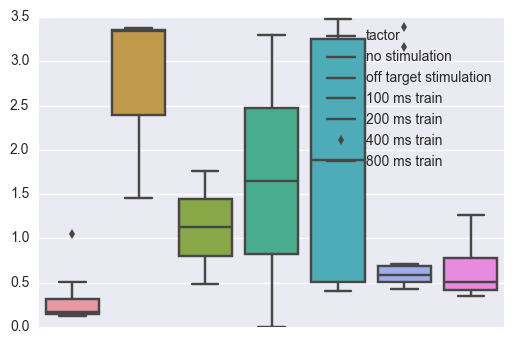

In [14]:
frame1 = sns.boxplot(data = dataFdict)
frame1.axes.get_xaxis().set_visible(False)
frame1.legend(dataFdict.columns)

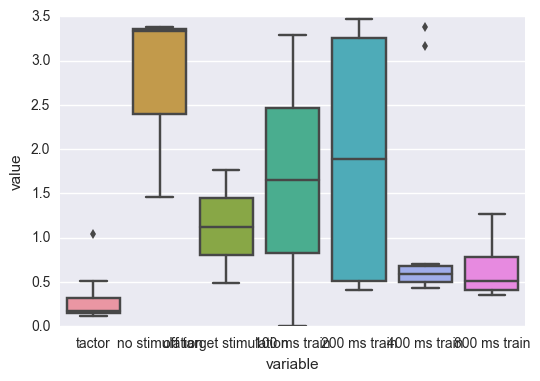

In [35]:
frame2 = sns.boxplot(x = 'variable',y='value',data = dataMelt)

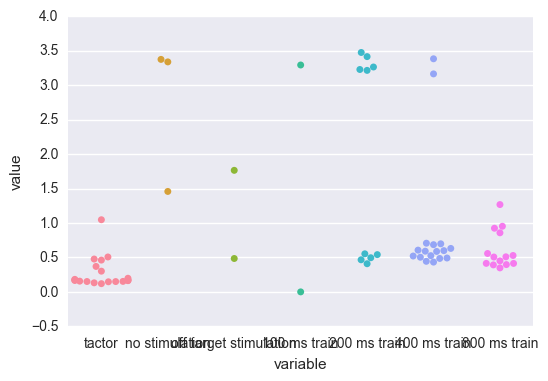

In [36]:
frame2 = sns.swarmplot(x = 'variable',y='value',data = dataMelt)

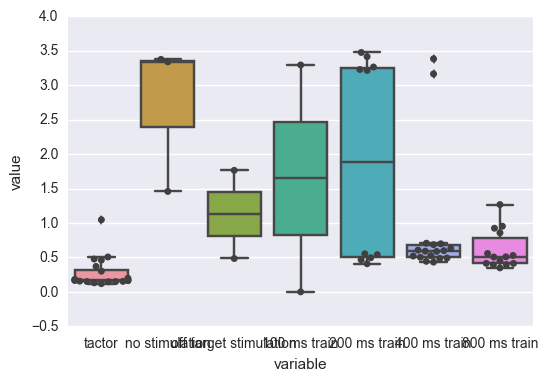

In [40]:
frame3 = sns.boxplot(x = 'variable',y='value',data = dataMelt)
frame3 = sns.swarmplot(x = 'variable',y='value',data = dataMelt,color=".25")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC56B70A90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001DC56D93518>]], dtype=object)

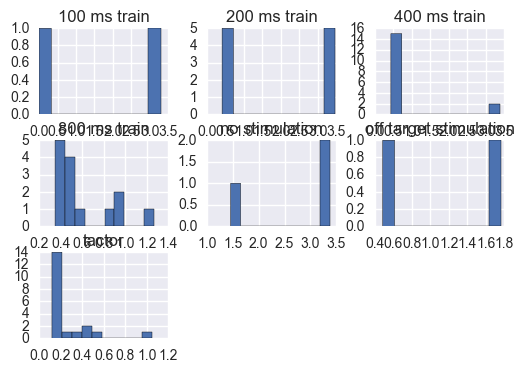

In [15]:
dataFdict.hist()

TypeError: cannot perform reduce with flexible type

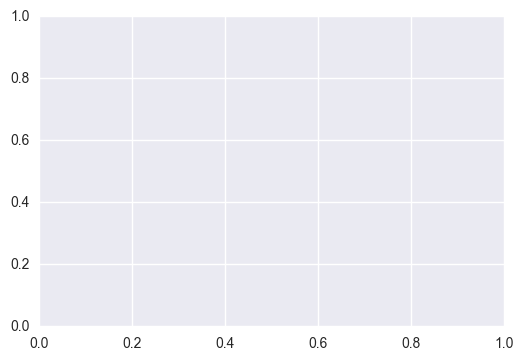

In [16]:
fig, ax = plt.subplots()
for a in dataFdict.columns:
    sns.distplot(a, bins=range(1, 110, 10), ax=ax, kde=False)
ax.set_xlim([0, 100])

In [19]:
from bokeh.charts import BoxPlot, show
from bokeh.sampledata.autompg import autompg as df
output_notebook


<function bokeh.io.output_notebook>

In [42]:

p = BoxPlot(dataMelt.dropna(), values='value', label='variable',color='variable',
            title="MPG Summary (grouped by CYL)")


show(p)

In [21]:
df

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [ ]:
dataFdict['tactor']

In [ ]:
x = values[0]
y = values[1]

In [ ]:
a = []
a.append(x)
a.append(y)

In [ ]:
a[1][0,1]

In [ ]:
a = pd.DataFrame([values,columns=keys)

In [ ]:
c = [button[0,n] for n in np.arange(0,button.shape[1])]

In [ ]:
c.shape

In [ ]:
d = zip(c)

In [ ]:
d

In [ ]:
b.items()

In [ ]:
temp = pd.DataFrame.from_dict(button,orient='columns')

In [ ]:
temp

In [ ]:
temp2 = pd.melt(temp)

In [ ]:
temp2

In [ ]:
sns.boxplot(data=dataF)

In [ ]:
temp3